In [2]:
import sys
PATH_TO_MODULES = '../..'
sys.path.insert(0, PATH_TO_MODULES)

from helpers import plot_residuals

# Data Manipulation and Math/Stats Libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm

# Sci-kit Learn Functions
from sklearn.preprocessing import StandardScaler

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import plotly.express as px
import plotly.graph_objects as go

In [3]:
# Import merged dataset
path = PATH_TO_MODULES + '/datasets/'
filename = 'X_train_filled_KPIs_QoQ.csv'
dataset = pd.read_csv(path + filename)

In [4]:
print(f'There are {dataset.shape[0]} rows in the dataset.')

There are 1931 rows in the dataset.


## KPI Exploration

In [14]:
# Make new dataframe keeping only KPI's and the target (Net Income)
covariates = []
for column in dataset.columns:
    if 'KPI' in column:
        covariates.append(column)
regressand = ['Revenue_2025Q1']
analysis_df = dataset[covariates + regressand]

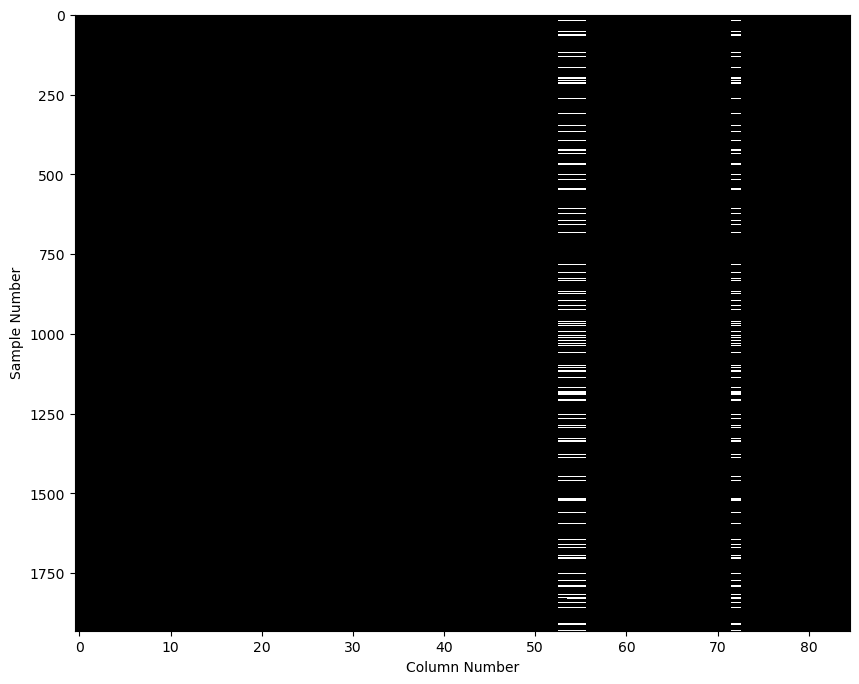

In [15]:
# Missing values show in white in the figure
plt.figure(figsize=(10, 8))
plt.imshow(analysis_df.isna(), aspect='auto', interpolation='nearest', cmap='gray')
plt.xlabel('Column Number')
plt.ylabel('Sample Number')
plt.show()

In [16]:
# List features missing the most data
analysis_df.isna().mean().sort_values(ascending=False)[:20]

KPI_GrossProfitMargin_QoQ_24Q4_25Q1    0.141895
KPI_GrossProfitMargin_QoQ_Rate         0.141895
KPI_GrossProfitMargin_QoQ_24Q3_24Q4    0.141895
KPI_GrossProfitMargin_QoQ_24Q2_24Q3    0.141378
KPI_ReturnOnEquity_QoQ_Rate            0.001036
KPI_ReturnOnAssets_QoQ_Rate            0.001036
KPI_NetProfitMargin_2024Q4             0.000000
KPI_NetProfitMargin_2024Q3             0.000000
KPI_WorkingCapital_2024Q2              0.000000
KPI_WorkingCapital_2024Q3              0.000000
KPI_WorkingCapital_2024Q4              0.000000
KPI_WorkingCapital_2025Q1              0.000000
KPI_CurrentRatio_2024Q2                0.000000
KPI_CurrentRatio_2024Q3                0.000000
KPI_CurrentRatio_2024Q4                0.000000
KPI_NetProfitMargin_2025Q1             0.000000
KPI_GrossProfitMargin_2024Q2           0.000000
KPI_GrossProfitMargin_2024Q3           0.000000
KPI_GrossProfitMargin_2024Q4           0.000000
KPI_GrossProfitMargin_2025Q1           0.000000
dtype: float64

In [17]:
# Drop missing values to facilitate early analysis
analysis_df = analysis_df.copy().dropna()
no_rows = analysis_df.shape[0]
print(f'After dropping missing values, we are down to only {no_rows} observations.')

After dropping missing values, we are down to only 1655 observations.



## Linear Regression

### Predict EPS_2025Q2 using KPI's from 2025Q1

Attempting a linear regression at this stage will allow us to examine the residuals to see if there are any patterns.  The presence of a pattern might indicate a need to transform either the regressand, the covariate, or both, to obtain a linear relationship.

In [18]:
y = analysis_df['Revenue_2025Q1'].values.reshape(-1, 1)
X = analysis_df.drop(columns=['Revenue_2025Q1'])
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

MissingDataError: exog contains inf or nans

In [ ]:
# Remove the covariate with the lowest p-value.
X.drop(columns=['KPI_Leverage_2025Q1'], inplace=True)
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

R-squared of 0.067 indicates that a simple linear model using KPI's explains very little about the observed EPS for the next quarter.  Let's see if we can find any patterns in these residuals.

**Next steps:**
 - examine residuals of each covariate vs. the regressand for patterns
 - if a pattern is found, apply an appropriate transformation to obtain a linear relationship


### Plot of residuals for multivariate regression

In [ ]:
fig = plt.figure()
ax = fig.subplots()
ax.scatter(y, results.resid)
plt.show()

The plot shows a linear relationship between the residuals (the noise) and the regressand.  I would interpret this to mean that there is no linear relationship that can be found between the regrassand and the covariates.


### Plot of each residual distribution for univariate regressions


In [ ]:
for column in X:
    plot_residuals(X[column], y)

These plots indicate that residual distributions are not normally distributed.  
Simple linear regression does not appear to be a good model choice.

**Further steps...**
 - Once we are finished with attempting to transform variables, we will need to split the data into train/validate/test sets.
 - Once data is split, we can begin to explore dimensionality reduction and other ML-enabled feature selection techniques.